# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [27]:
# Install the required libraries
!pip install prophet

In [28]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [29]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-29-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [30]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


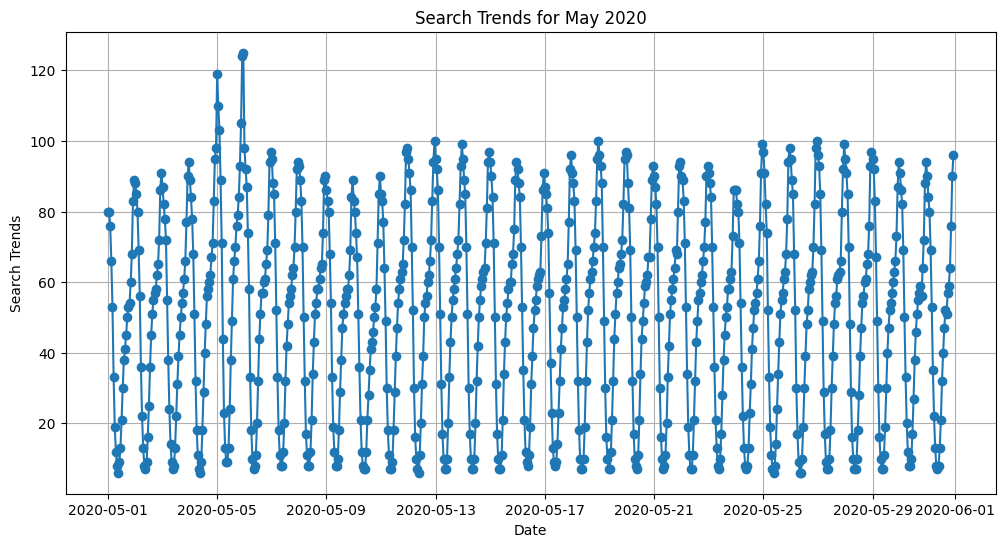

In [31]:
# Slice the DataFrame to just the month of May 2020
may_2020_df = df_mercado_trends.loc['2020-05-01':'2020-05-31']


# Plot to visualize the data for May 2020
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(may_2020_df.index, may_2020_df['Search Trends'], marker='o')
plt.title('Search Trends for May 2020')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.grid(True)
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [32]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_df['Search Trends'].sum()


# View the traffic_may_2020 value
print(traffic_may_2020)


38181


In [33]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions

monthly_sums = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month])['Search Trends'].sum()
median_monthly_traffic = monthly_sums.median()

# View the median_monthly_traffic value
print(median_monthly_traffic)


35172.5


In [34]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

1.0855355746677091

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes but by a very small margin as the sum of traffic durring may is 38181 and the median monthly sum is 35172.5

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

In [35]:
df = df_mercado_trends.copy()

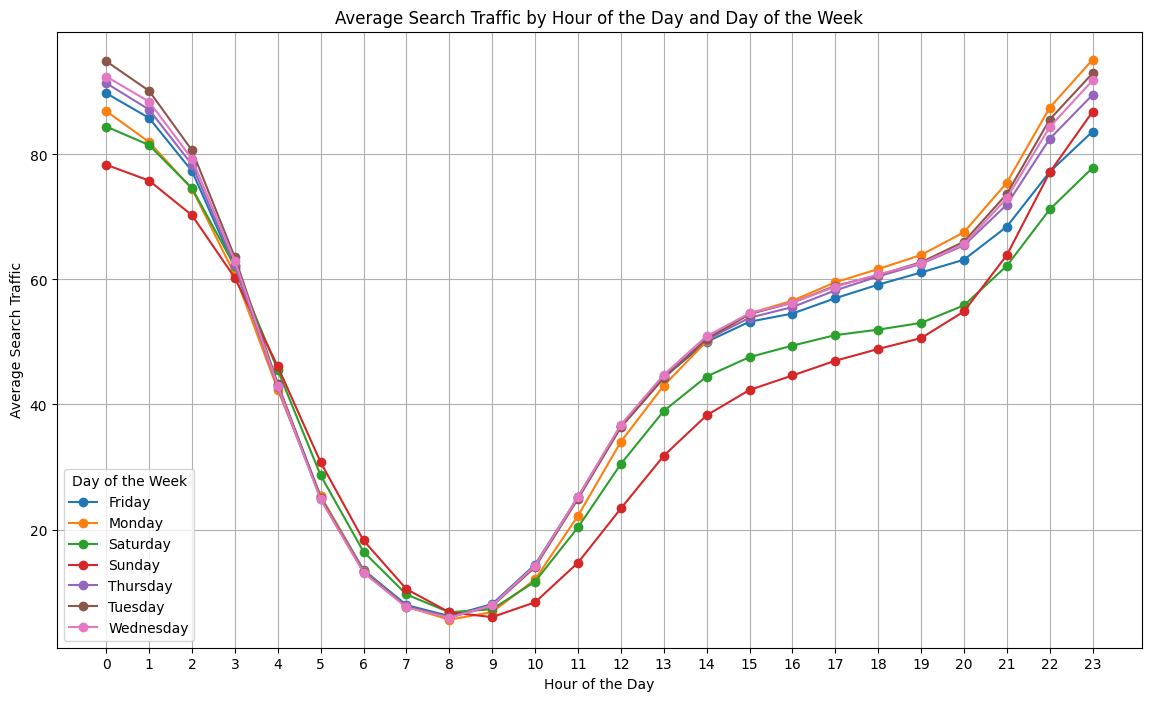

In [36]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.day_name()
average_traffic = df.groupby(['DayOfWeek', 'Hour'])['Search Trends'].mean().unstack()
plt.figure(figsize=(14, 8))
for day in average_traffic.index:
    plt.plot(average_traffic.columns, average_traffic.loc[day], marker='o', label=day)

plt.title('Average Search Traffic by Hour of the Day and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Search Traffic')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.xticks(range(24))  # Ensure x-axis shows all hours
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

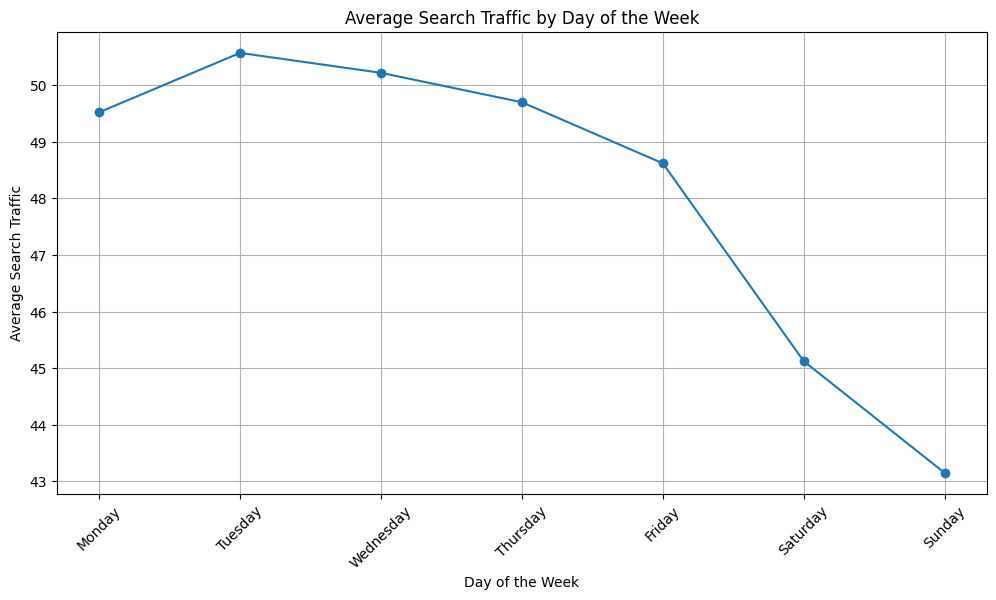

In [37]:
# Extract the day of the week from the index
df['DayOfWeek'] = df.index.dayofweek

# Group by day of the week and calculate the mean search traffic
average_traffic_by_day = df.groupby('DayOfWeek')['Search Trends'].mean()

# Convert day of the week numbers to day names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_traffic_by_day.index = average_traffic_by_day.index.map(lambda x: day_names[x])

# Plot the average traffic by day of the week
plt.figure(figsize=(12, 6))
plt.plot(average_traffic_by_day.index, average_traffic_by_day, marker='o', linestyle='-')
plt.title('Average Search Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

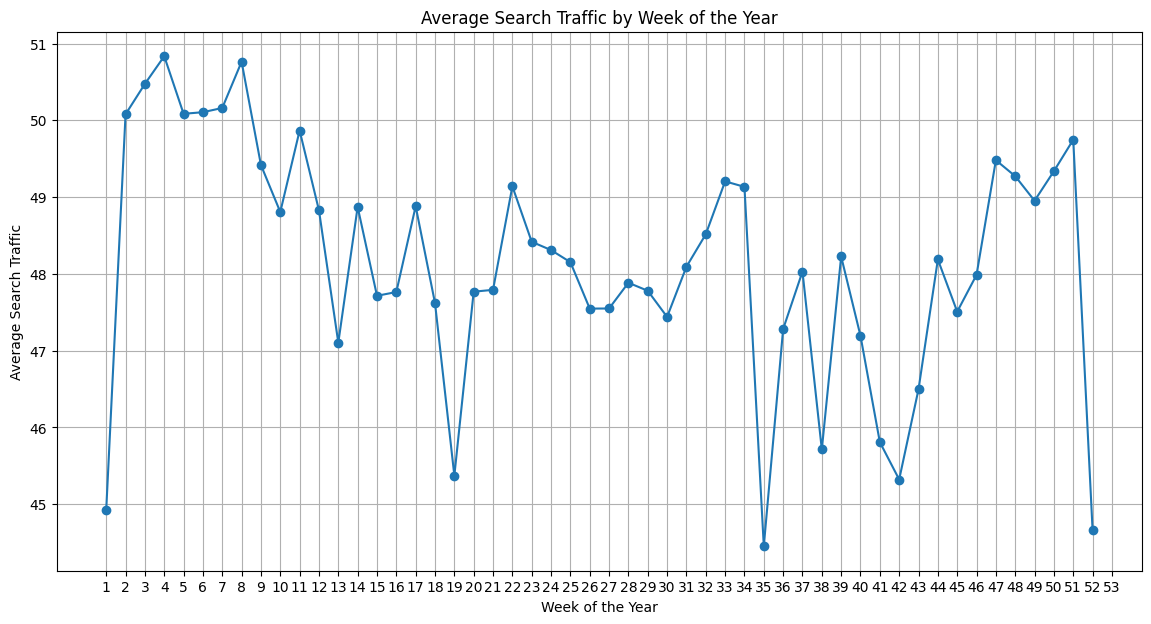

In [38]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
# Extract the week of the year from the index
df['WeekOfYear'] = df.index.isocalendar().week

# Group by week of the year, then calculate the mean search traffic
average_traffic_by_week = df.groupby('WeekOfYear')['Search Trends'].mean()

# Plot the average traffic by week of the year
plt.figure(figsize=(14, 7))
plt.plot(average_traffic_by_week.index, average_traffic_by_week, marker='o', linestyle='-')
plt.title('Average Search Traffic by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.xticks(range(1, 54))  # Ensure x-axis shows all possible weeks
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Search traffic is lowest at 8 am every day of the week and is lowest on sundays, overall on a yearly basis there is a slight decline from begining of the year to the end of the year with some outliers visible throught the year

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [39]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


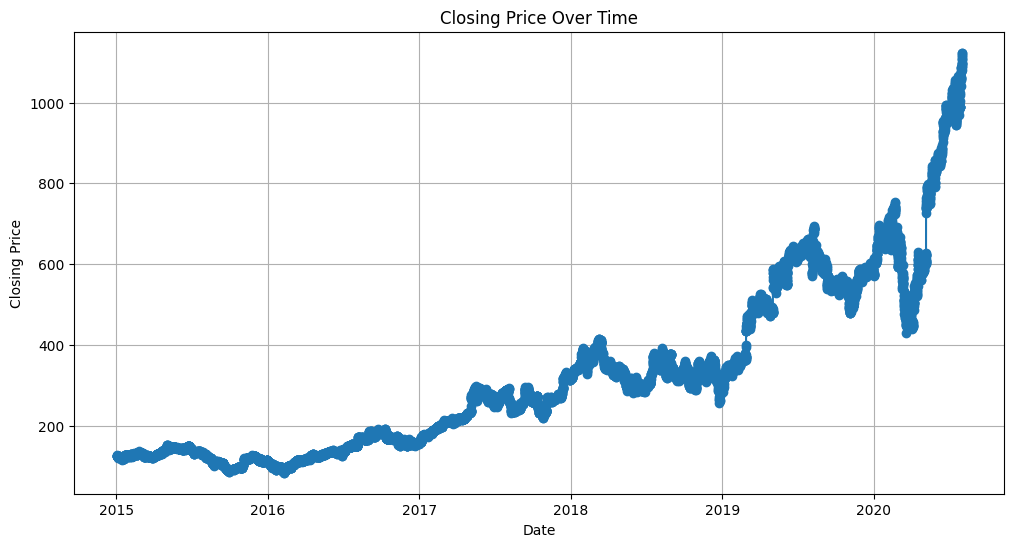

In [40]:
# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], marker='o', linestyle='-')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [41]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
combined_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1)
combined_df = combined_df.dropna(thresh=2)


# View the first and last five rows of the DataFrame
print("First five rows:")
print(combined_df.head())

print("\nLast five rows:")
print(combined_df.tail())

First five rows:
                      close  Search Trends
2016-06-01 09:00:00  135.16            6.0
2016-06-01 10:00:00  136.63           12.0
2016-06-01 11:00:00  136.56           22.0
2016-06-01 12:00:00  136.42           33.0
2016-06-01 13:00:00  136.10           40.0

Last five rows:
                        close  Search Trends
2020-07-31 11:00:00  1105.780           20.0
2020-07-31 12:00:00  1087.925           32.0
2020-07-31 13:00:00  1095.800           41.0
2020-07-31 14:00:00  1110.650           47.0
2020-07-31 15:00:00  1122.510           53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [42]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = combined_df.loc['2020-01':'2020-06']


# View the first and last five rows of first_half_2020 DataFrame
print("First five rows:")
print(first_half_2020.head())

print("\nLast five rows:")
print(first_half_2020.tail())

First five rows:
                       close  Search Trends
2020-01-02 09:00:00  601.085            9.0
2020-01-02 10:00:00  601.290           14.0
2020-01-02 11:00:00  615.410           25.0
2020-01-02 12:00:00  611.400           37.0
2020-01-02 13:00:00  611.830           50.0

Last five rows:
                      close  Search Trends
2020-06-30 11:00:00  976.17           17.0
2020-06-30 12:00:00  977.50           27.0
2020-06-30 13:00:00  973.23           37.0
2020-06-30 14:00:00  976.50           45.0
2020-06-30 15:00:00  984.93           51.0


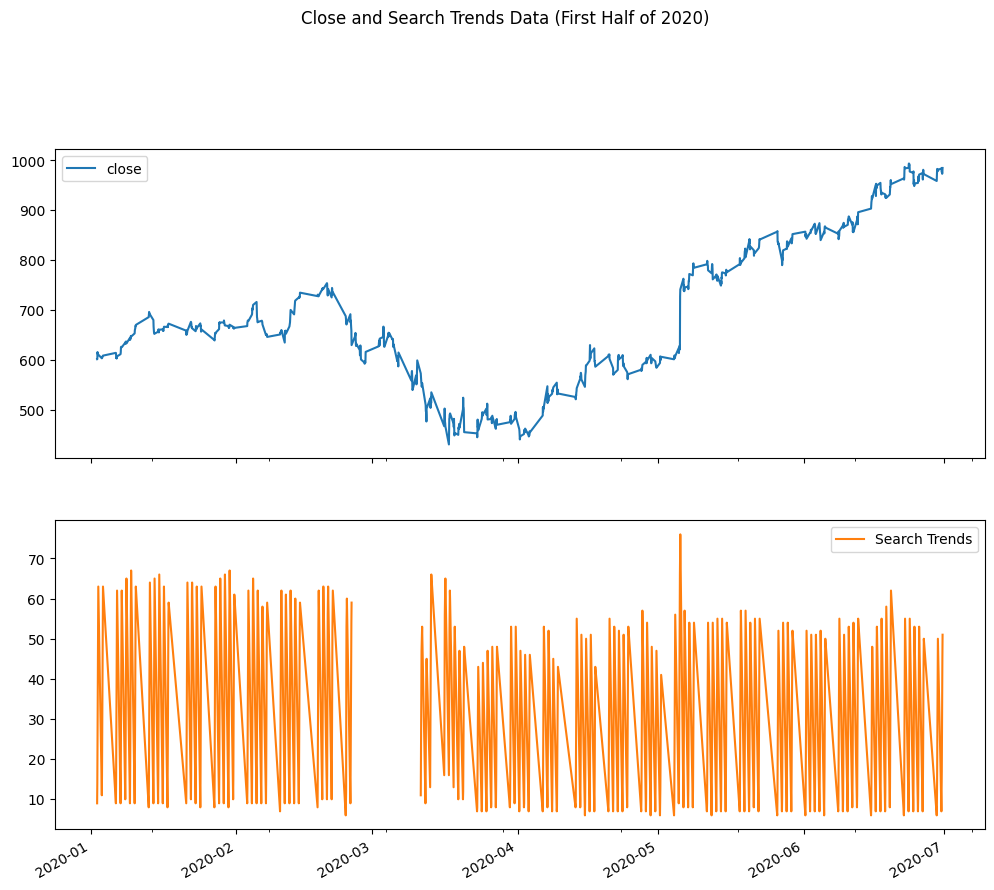

In [44]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
# Plot each column on separate axes
first_half_2020.plot(subplots=True, layout=(2, 1), figsize=(12, 10), sharex=True)
plt.suptitle('Close and Search Trends Data (First Half of 2020)', y=1.02)

# Display the plot
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Yes the stock price went down when the search trends are NaN and the stock price rose when the search trends increased in May

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [53]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df = combined_df
# Create a new column 'Lagged Search Trends' by shifting 'Search Trends' by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)

# View the first and last five rows to verify the new column
print("First five rows:")
print(mercado_stock_trends_df.head())

print("\nLast five rows:")
print(mercado_stock_trends_df.tail())

First five rows:
                      close  Search Trends  Lagged Search Trends
2015-01-02 09:00:00  127.67            NaN                   NaN
2015-01-02 10:00:00  125.44            NaN                   NaN
2015-01-02 11:00:00  125.57            NaN                   NaN
2015-01-02 12:00:00  125.40            NaN                   NaN
2015-01-02 13:00:00  125.17            NaN                   NaN

Last five rows:
                        close  Search Trends  Lagged Search Trends
2020-07-31 11:00:00  1105.780           20.0                  11.0
2020-07-31 12:00:00  1087.925           32.0                  20.0
2020-07-31 13:00:00  1095.800           41.0                  32.0
2020-07-31 14:00:00  1110.650           47.0                  41.0
2020-07-31 15:00:00  1122.510           53.0                  47.0


In [54]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
# Calculate daily returns
mercado_stock_trends_df['Returns'] = mercado_stock_trends_df['close'].pct_change()

# Calculate the rolling standard deviation of returns with a window of 4 periods
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['Returns'].rolling(window=4).std()

# View the first and last five rows to verify the new column
print("First five rows:")
print(mercado_stock_trends_df.head())

print("\nLast five rows:")
print(mercado_stock_trends_df.tail())


First five rows:
                      close  Search Trends  Lagged Search Trends   Returns  \
2015-01-02 09:00:00  127.67            NaN                   NaN       NaN   
2015-01-02 10:00:00  125.44            NaN                   NaN -0.017467   
2015-01-02 11:00:00  125.57            NaN                   NaN  0.001036   
2015-01-02 12:00:00  125.40            NaN                   NaN -0.001354   
2015-01-02 13:00:00  125.17            NaN                   NaN -0.001834   

                     Stock Volatility  
2015-01-02 09:00:00               NaN  
2015-01-02 10:00:00               NaN  
2015-01-02 11:00:00               NaN  
2015-01-02 12:00:00               NaN  
2015-01-02 13:00:00          0.008468  

Last five rows:
                        close  Search Trends  Lagged Search Trends   Returns  \
2020-07-31 11:00:00  1105.780           20.0                  11.0  0.006380   
2020-07-31 12:00:00  1087.925           32.0                  20.0 -0.016147   
2020-07-31 13:00:

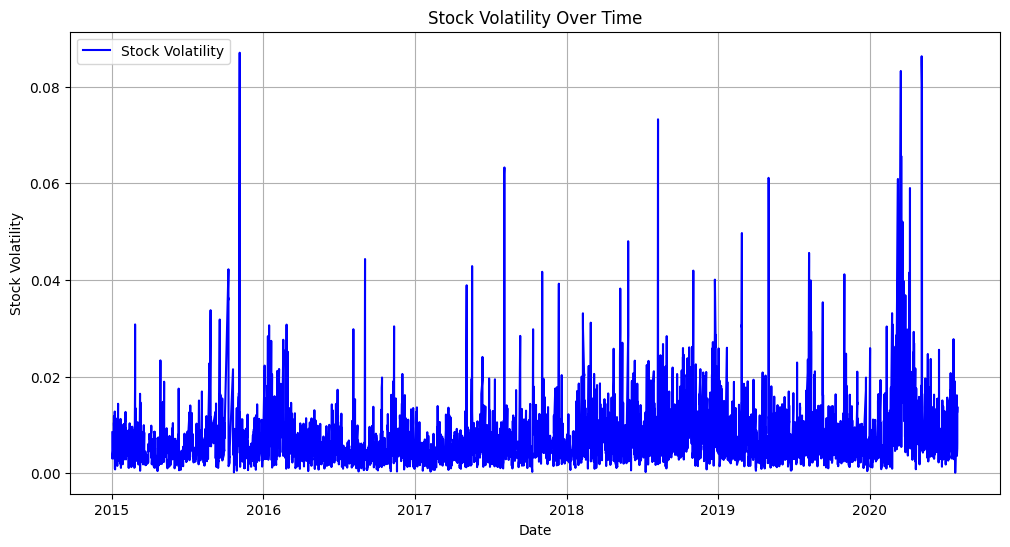

In [55]:
# Visualize the stock volatility
plt.figure(figsize=(12, 6))
plt.plot(mercado_stock_trends_df.index, mercado_stock_trends_df['Stock Volatility'], label='Stock Volatility', color='blue')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Volatility')
plt.legend()
plt.grid(True)
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [58]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
# Calculate hourly returns
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].resample('H').ffill().pct_change()



In [57]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame

# View the first and last five rows to verify the new column
print("First five rows:")
print(mercado_stock_trends_df.head())

print("\nLast five rows:")
print(mercado_stock_trends_df.tail())

First five rows:
                      close  Search Trends  Lagged Search Trends   Returns  \
2015-01-02 09:00:00  127.67            NaN                   NaN       NaN   
2015-01-02 10:00:00  125.44            NaN                   NaN -0.017467   
2015-01-02 11:00:00  125.57            NaN                   NaN  0.001036   
2015-01-02 12:00:00  125.40            NaN                   NaN -0.001354   
2015-01-02 13:00:00  125.17            NaN                   NaN -0.001834   

                     Stock Volatility  Hourly Stock Return  
2015-01-02 09:00:00               NaN                  NaN  
2015-01-02 10:00:00               NaN            -0.017467  
2015-01-02 11:00:00               NaN             0.001036  
2015-01-02 12:00:00               NaN            -0.001354  
2015-01-02 13:00:00          0.008468            -0.001834  

Last five rows:
                        close  Search Trends  Lagged Search Trends   Returns  \
2020-07-31 11:00:00  1105.780           20.0       

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [59]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.149348,0.065125
Lagged Search Trends,-0.149348,1.000000,0.020248
Hourly Stock Return,0.065125,0.020248,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There is no clear relationship but if there is one it would apear to be an inverse relationship as there is a weak negative correlation

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [61]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()


# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'}, inplace=True)


# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df.dropna(inplace=True)


# View the first and last five rows of the mercado_prophet_df DataFrame
print("First five rows:")
print(mercado_prophet_df.head())

print("\nLast five rows:")
print(mercado_prophet_df.tail())

First five rows:
                   ds   y
0 2016-06-01 00:00:00  97
1 2016-06-01 01:00:00  92
2 2016-06-01 02:00:00  76
3 2016-06-01 03:00:00  60
4 2016-06-01 04:00:00  38

Last five rows:
                       ds   y
37101 2020-09-07 20:00:00  71
37102 2020-09-07 21:00:00  83
37103 2020-09-07 22:00:00  96
37104 2020-09-07 23:00:00  97
37105 2020-09-08 00:00:00  96


In [62]:
# Call the Prophet function, store as an object
prophet_model = Prophet()

In [63]:
# Fit the time-series model.
prophet_model.fit(mercado_prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u99_f55/ieareqmt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u99_f55/omlbj7vc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30655', 'data', 'file=/tmp/tmp7u99_f55/ieareqmt.json', 'init=/tmp/tmp7u99_f55/omlbj7vc.json', 'output', 'file=/tmp/tmp7u99_f55/prophet_modelw5r99fr8/prophet_model-20240723183355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [64]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)

future_mercado_trends = prophet_model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
print("Last five rows of future_mercado_trends DataFrame:")
print(future_mercado_trends.tail())

Last five rows of future_mercado_trends DataFrame:
                       ds
39101 2020-11-30 04:00:00
39102 2020-11-30 05:00:00
39103 2020-11-30 06:00:00
39104 2020-11-30 07:00:00
39105 2020-11-30 08:00:00


In [65]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame

forecast_mercado_trends = prophet_model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
print("First five rows of forecast_mercado_trends DataFrame:")
print(forecast_mercado_trends.head())

First five rows of forecast_mercado_trends DataFrame:
                   ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 2016-06-01 00:00:00  44.469500   80.941556   97.530662    44.469500   
1 2016-06-01 01:00:00  44.470406   77.787517   95.014836    44.470406   
2 2016-06-01 02:00:00  44.471312   67.328735   84.371654    44.471312   
3 2016-06-01 03:00:00  44.472218   51.643706   68.601002    44.472218   
4 2016-06-01 04:00:00  44.473124   34.716566   52.011793    44.473124   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    44.469500       45.159722             45.159722             45.159722   
1    44.470406       41.605529             41.605529             41.605529   
2    44.471312       31.282049             31.282049             31.282049   
3    44.472218       16.014826             16.014826             16.014826   
4    44.473124       -1.100073             -1.100073             -1.100073   

       daily  ...    weekly  weekly_lo

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

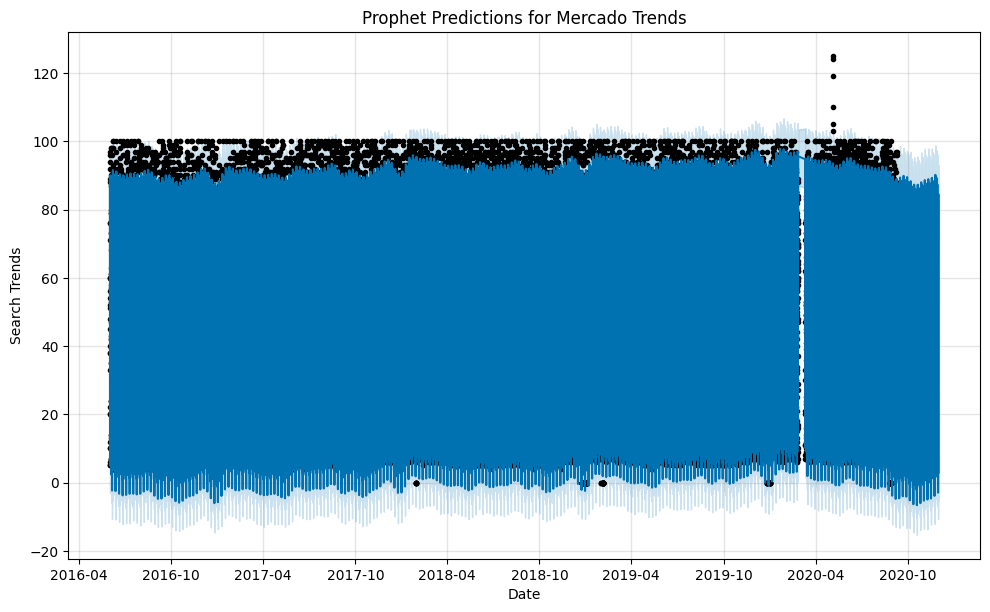

In [66]:
# Plot the Prophet predictions for the Mercado trends data
fig = prophet_model.plot(forecast_mercado_trends)

# Customize the plot
plt.title('Prophet Predictions for Mercado Trends')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The forecast predicts that the popularity will decrease


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [67]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column

forecast_mercado_trends.set_index('ds', inplace=True)

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
# View only the 'yhat', 'yhat_lower', and 'yhat_upper' columns
forecast_columns = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

# Display the first and last five rows
print("First five rows of forecast_columns DataFrame:")
print(forecast_columns.head())

print("\nLast five rows of forecast_columns DataFrame:")
print(forecast_columns.tail())


First five rows of forecast_columns DataFrame:
                          yhat  yhat_lower  yhat_upper
ds                                                    
2016-06-01 00:00:00  89.629222   80.941556   97.530662
2016-06-01 01:00:00  86.075935   77.787517   95.014836
2016-06-01 02:00:00  75.753361   67.328735   84.371654
2016-06-01 03:00:00  60.487045   51.643706   68.601002
2016-06-01 04:00:00  43.373051   34.716566   52.011793

Last five rows of forecast_columns DataFrame:
                          yhat  yhat_lower  yhat_upper
ds                                                    
2020-11-30 04:00:00  39.781638   32.262907   48.613215
2020-11-30 05:00:00  24.310504   15.451847   32.970315
2020-11-30 06:00:00  12.344836    3.581286   20.890759
2020-11-30 07:00:00   5.072692   -3.163243   13.950227
2020-11-30 08:00:00   2.877820   -5.502161   11.069559


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

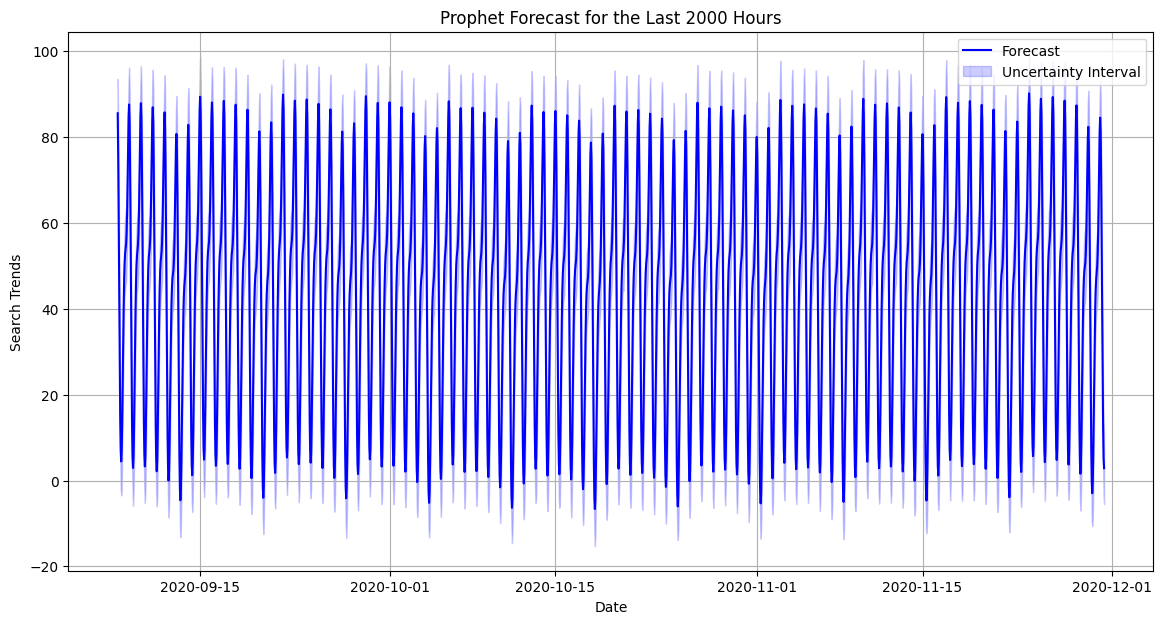

In [68]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
# Slice the DataFrame to get the last 2000 hours
last_2000_hours = forecast_mercado_trends.tail(2000)

# Plot the yhat, yhat_lower, and yhat_upper columns
plt.figure(figsize=(14, 7))
plt.plot(last_2000_hours.index, last_2000_hours['yhat'], label='Forecast', color='blue')
plt.fill_between(last_2000_hours.index, last_2000_hours['yhat_lower'], last_2000_hours['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Interval')

# Customize the plot
plt.title('Prophet Forecast for the Last 2000 Hours')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


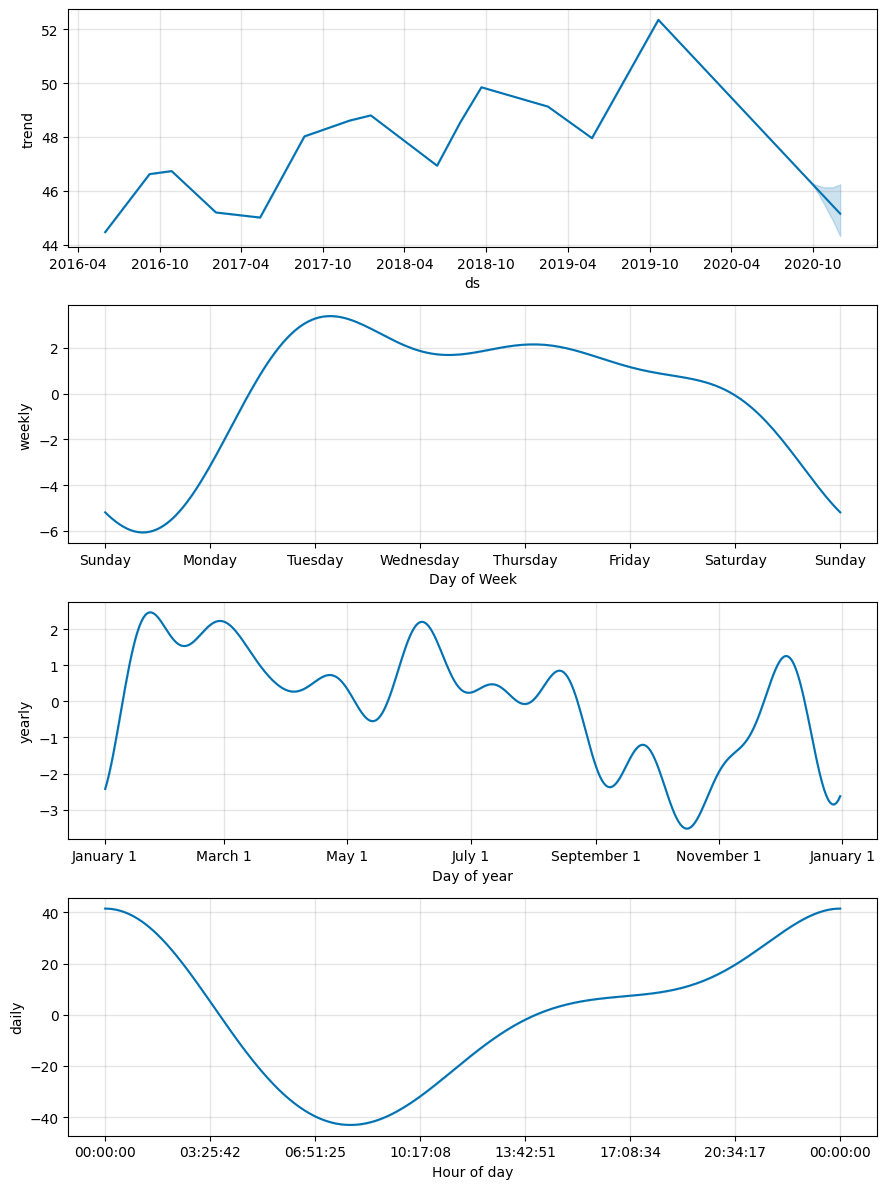

In [70]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends_reset = forecast_mercado_trends.reset_index()


# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
# Check if 'ds' column exists
print(forecast_mercado_trends_reset.columns)

# Use the plot_components function to visualize the forecast components
fig = prophet_model.plot_components(forecast_mercado_trends_reset)

# Show the plot
plt.show()

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** The hourly trend is highest at 00:00:00

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The lowest point is in between october 1 and november 1
